In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import random
import time

In [3]:
## Loading data
sediment = pd.read_csv('C:/Users/User/Desktop/sediment_read.csv', encoding='cp949')

In [4]:
sediment = sediment.dropna(axis=0).dropna(axis=1)

In [5]:
sediment

,region,spot,year,month,day,half,pollution,depth,WT,DO,...,Pb,Zn,Cu,Cr,Ni,As,Cd,Hg,Al,Li
0,Nakdong,거창위천2,2015,3,30,first,slightlybad,0.5,15,8.7,...,19.9,55.0,11.5,21.6,3.2,1.5,0.10,0.091,9.35,14.6
1,Geum,곡교천2,2015,3,31,first,slightlybad,1.0,16,6.3,...,29.6,259.9,104.9,90.4,35.0,6.7,0.55,0.093,10.77,33.9
2,Yeongsan,곡성,2015,3,26,first,normal,0.7,15,12.5,...,28.9,127.5,24.7,32.9,14.5,7.9,0.24,0.048,7.70,77.5
3,Nakdong,곤양천,2015,3,23,first,slightlybad,1.0,13,10.3,...,10.3,77.1,15.8,251.8,17.3,3.2,0.10,0.013,6.51,15.5
4,Yeongsan,광양서천,2015,3,30,first,slightlybad,0.7,16,11.1,...,44.1,237.7,45.1,45.7,20.6,10.0,0.58,0.041,9.36,34.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3201,Nakdong,연초댐1,2022,6,15,first,slightlybad,13.0,23,9.6,...,20.7,122.3,36.7,45.8,19.9,7.6,0.29,0.078,7.12,70.0
3202,Nakdong,영주댐1,2022,6,17,first,slightlybad,21.0,22,8.5,...,26.7,160.5,21.5,44.4,15.1,9.8,0.21,0.079,8.62,86.2
3203,Nakdong,영주댐2,2022,6,17,first,slightlybad,9.0,23,9.8,...,30.3,195.4,31.0,44.3,17.8,13.4,0.25,0.101,9.54,95.0
3204,Nakdong,영주댐3,2022,6,17,first,slightlybad,9.0,24,15.6,...,23.9,208.4,23.9,40.9,15.8,7.8,0.22,0.070,9.86,77.0


In [6]:
## Divide train and test
sediment_train_x = sediment.loc[(sediment.year != 2021) & (sediment.year != 2022),:].iloc[:,range(7,32)]
sediment_train_y = sediment.loc[(sediment.year != 2021) & (sediment.year != 2022),:].iloc[:,6]
sediment_test_x = sediment.loc[(sediment.year == 2021) | (sediment.year == 2022),:].iloc[:,range(7,32)]
sediment_test_y = sediment.loc[(sediment.year == 2021) | (sediment.year == 2022),:].iloc[:,6]

Han = sediment.loc[sediment.region == "Han",:]
Han_train_x = Han.loc[(Han.year != 2021) & (Han.year != 2022),:].iloc[:,range(7,32)]
Han_train_y = Han.loc[(Han.year != 2021) & (Han.year != 2022),:].iloc[:,6]
Han_test_x = Han.loc[(Han.year == 2021) | (Han.year == 2022),:].iloc[:,range(7,32)]
Han_test_y = Han.loc[(Han.year == 2021) | (Han.year == 2022),:].iloc[:,6]

Nakdong = sediment.loc[sediment.region == "Nakdong",:]
Nakdong_train_x = Nakdong.loc[(Nakdong.year != 2021) & (Nakdong.year != 2022),:].iloc[:,range(7,32)]
Nakdong_train_y = Nakdong.loc[(Nakdong.year != 2021) & (Nakdong.year != 2022),:].iloc[:,6]
Nakdong_test_x = Nakdong.loc[(Nakdong.year == 2021) | (Nakdong.year == 2022),:].iloc[:,range(7,32)]
Nakdong_test_y = Nakdong.loc[(Nakdong.year == 2021) | (Nakdong.year == 2022),:].iloc[:,6]

Geum = sediment.loc[sediment.region == "Geum",:]
Geum_train_x = Geum.loc[(Geum.year != 2021) & (Geum.year != 2022),:].iloc[:,range(7,32)]
Geum_train_y = Geum.loc[(Geum.year != 2021) & (Geum.year != 2022),:].iloc[:,6]
Geum_test_x = Geum.loc[(Geum.year == 2021) | (Geum.year == 2022),:].iloc[:,range(7,32)]
Geum_test_y = Geum.loc[(Geum.year == 2021) | (Geum.year == 2022),:].iloc[:,6]

Yeongsan = sediment.loc[sediment.region == "Yeongsan",:]
Yeongsan_train_x = Yeongsan.loc[(Yeongsan.year != 2021) & (Yeongsan.year != 2022),:].iloc[:,range(7,32)]
Yeongsan_train_y = Yeongsan.loc[(Yeongsan.year != 2021) & (Yeongsan.year != 2022),:].iloc[:,6]
Yeongsan_test_x = Yeongsan.loc[(Yeongsan.year == 2021) | (Yeongsan.year == 2022),:].iloc[:,range(7,32)]
Yeongsan_test_y = Yeongsan.loc[(Yeongsan.year == 2021) | (Yeongsan.year == 2022),:].iloc[:,6]

In [7]:
### Label Encoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
sediment['encoded_pollution'] = encoder.fit_transform(sediment['pollution'])
sediment['encoded_pollution']

0       2
1       2
2       1
3       2
4       2
       ..
3201    2
3202    2
3203    2
3204    2
3205    2
Name: encoded_pollution, Length: 3205, dtype: int32

In [8]:
encoder.inverse_transform(sediment['encoded_pollution'])

array(['slightlybad', 'slightlybad', 'normal', ..., 'slightlybad',
       'slightlybad', 'slightlybad'], dtype=object)

In [9]:
sediment_train_x = sediment.loc[(sediment.year != 2021) & (sediment.year != 2022),:].iloc[:,range(7,32)]
sediment_train_y = sediment.loc[(sediment.year != 2021) & (sediment.year != 2022),:].iloc[:,6]
sediment_encoded_train_y = sediment.loc[(sediment.year != 2021) & (sediment.year != 2022),:].iloc[:,32]
sediment_test_x = sediment.loc[(sediment.year == 2021) | (sediment.year == 2022),:].iloc[:,range(7,32)]
sediment_test_y = sediment.loc[(sediment.year == 2021) | (sediment.year == 2022),:].iloc[:,6]
sediment_encoded_test_y = sediment.loc[(sediment.year == 2021) | (sediment.year == 2022),:].iloc[:,32]

In [78]:
!pip install imbalanced-learn

In [26]:
### Sampling for imbalanced data
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from collections import Counter

from matplotlib import pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours 
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek

In [56]:
# SMOTE
sm_sample = SMOTE(random_state=42) 
sediment_train_x_sm, sediment_encoded_train_y_sm = sm_sample.fit_resample(sediment_train_x, sediment_encoded_train_y)

In [57]:
Counter(sediment_encoded_train_y)

Counter({2: 847, 1: 1630, 0: 107, 3: 105})

In [58]:
Counter(sediment_encoded_train_y_sm)

Counter({2: 1630, 1: 1630, 0: 1630, 3: 1630})

In [59]:
# ADASYN
ads_sample = ADASYN(random_state=42) 
sediment_train_x_ads, sediment_encoded_train_y_ads = ads_sample.fit_resample(sediment_train_x, sediment_encoded_train_y)

In [60]:
Counter(sediment_encoded_train_y)

Counter({2: 847, 1: 1630, 0: 107, 3: 105})

In [61]:
Counter(sediment_encoded_train_y_ads)

Counter({2: 1566, 1: 1630, 0: 1643, 3: 1617})

In [62]:
# SMOTE-ENN
sme_sample = SMOTEENN(random_state=42) 
sediment_train_x_sme, sediment_encoded_train_y_sme = sme_sample.fit_resample(sediment_train_x, sediment_encoded_train_y)

In [63]:
Counter(sediment_encoded_train_y)

Counter({2: 847, 1: 1630, 0: 107, 3: 105})

In [64]:
Counter(sediment_encoded_train_y_sme)

Counter({0: 1512, 1: 771, 2: 920, 3: 1525})

In [65]:
# SMOTE-Tomek
smt_sample = SMOTETomek(random_state=42) 
sediment_train_x_smt, sediment_encoded_train_y_smt = smt_sample.fit_resample(sediment_train_x, sediment_encoded_train_y)

In [66]:
Counter(sediment_encoded_train_y)

Counter({2: 847, 1: 1630, 0: 107, 3: 105})

In [67]:
Counter(sediment_encoded_train_y_smt)

Counter({2: 1540, 1: 1538, 0: 1627, 3: 1615})

In [ ]:
### Hyperparameter tuning reference
# KNN : https://www.kaggle.com/code/arunimsamudra/k-nn-with-hyperparameter-tuning
# GaussianNB : https://www.kaggle.com/code/akshaysharma001/naive-bayes-with-hyperpameter-tuning
# Bagging : https://www.kaggle.com/code/juanmah/tactic-03-hyperparameter-optimization-bagging
# Random Forest : https://www.kaggle.com/code/arjunprasadsarkhel/simple-random-forest-with-hyperparameter-tuning
# AdaBoost : https://www.kaggle.com/code/juanmah/tactic-03-hyperparameter-optimization-adaboost 
# XGBoost : https://www.kaggle.com/code/michalbrezk/xgboost-classifier-and-hyperparameter-tuning-85  
# SVM : https://www.kaggle.com/code/rajeevnair676/svm-hyperparameter-tuning

In [43]:
### K-Nearest Neighbor (KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay)

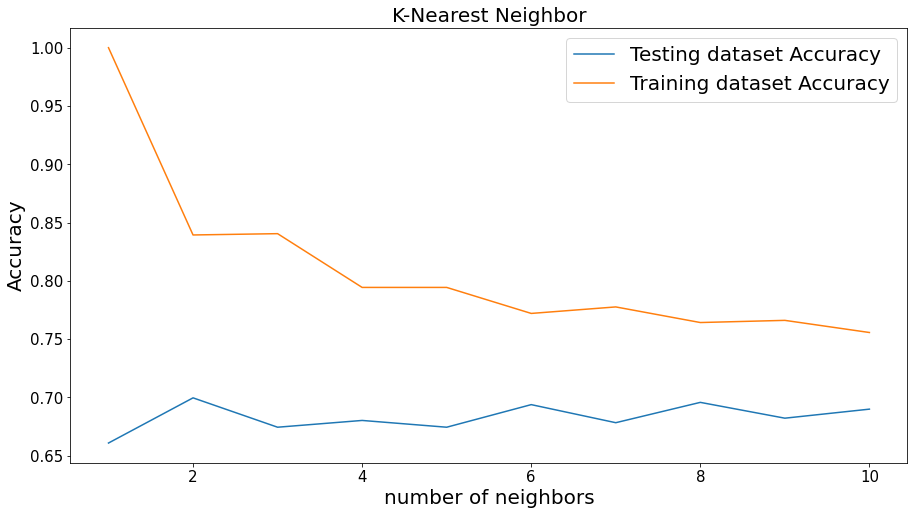

In [44]:
## Before BorderlineSMOTE
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(np.array(sediment_train_x), np.array(sediment_encoded_train_y))
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(np.array(sediment_train_x), np.array(sediment_encoded_train_y))
    test_accuracy[i] = knn.score(np.array(sediment_test_x), np.array(sediment_encoded_test_y))
  
# Generate plot
plt.figure(figsize=(15,8))
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend(fontsize=20)
plt.xlabel('number of neighbors', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('K-Nearest Neighbor', fontsize=20)

plt.show()

In [45]:
test_accuracy # select K=8 (test_accuracy=0.69573643)

array([0.66085271, 0.6996124 , 0.6744186 , 0.68023256, 0.6744186 ,
       0.69379845, 0.67829457, 0.69573643, 0.68217054, 0.68992248])

In [46]:
# modeling with K=8
knn = KNeighborsClassifier(n_neighbors=8)
  
knn.fit(np.array(sediment_train_x), np.array(sediment_encoded_train_y))

KNeighborsClassifier(n_neighbors=8)

In [47]:
# Predict on dataset which model has not seen before
print(knn.predict(np.array(sediment_test_x)))

[0 1 1 1 1 1 1 1 2 2 2 2 2 2 2 0 2 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 2 1
 2 1 1 1 1 1 1 1 0 2 2 2 2 1 1 2 1 1 2 2 0 1 2 1 0 2 0 1 1 1 1 1 1 1 2 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 0 1 2 1 1 1 1
 3 2 2 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 3 1 1 3 1 1 1 1 1 2 1
 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 2 2 1 1 1 3 2 1 1 2 1 1 1 2 1
 2 2 2 2 2 2 1 1 2 1 1 1 1 2 1 1 1 1 2 2 2 2 1 1 2 2 2 0 2 0 2 2 1 1 1 1 1
 2 2 2 1 1 2 2 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 2 2 1 2 3 1 2 1 1 1 2 1 1 2 2 1 1 1 1 1 3 1 1 2 1 1 1 1 1 3 2 3 2 1
 1 1 1 1 1 1 2 1 1 2 1 1 2 2 2 1 1 1 2 1 1 1 2 2 1 2 2 2 1 1 1 2 2 1 1 2 2
 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 1 1 1 1 1 1 1 1 2 1 1 2 2 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [48]:
# Calculate the accuracy and f1-score of the model
knn_pred = knn.predict(np.array(sediment_test_x))
accuracy = accuracy_score(knn_pred, np.array(sediment_encoded_test_y))
f1 = f1_score(knn_pred, np.array(sediment_encoded_test_y), average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6957364341085271
F1 Score: 0.7193977426535567


In [49]:
print(classification_report(knn_pred, np.array(sediment_encoded_test_y)))

              precision    recall  f1-score   support

           0       0.21      0.56      0.30         9
           1       0.89      0.73      0.80       382
           2       0.41      0.59      0.49       112
           3       0.48      0.77      0.59        13

    accuracy                           0.70       516
   macro avg       0.50      0.66      0.54       516
weighted avg       0.77      0.70      0.72       516



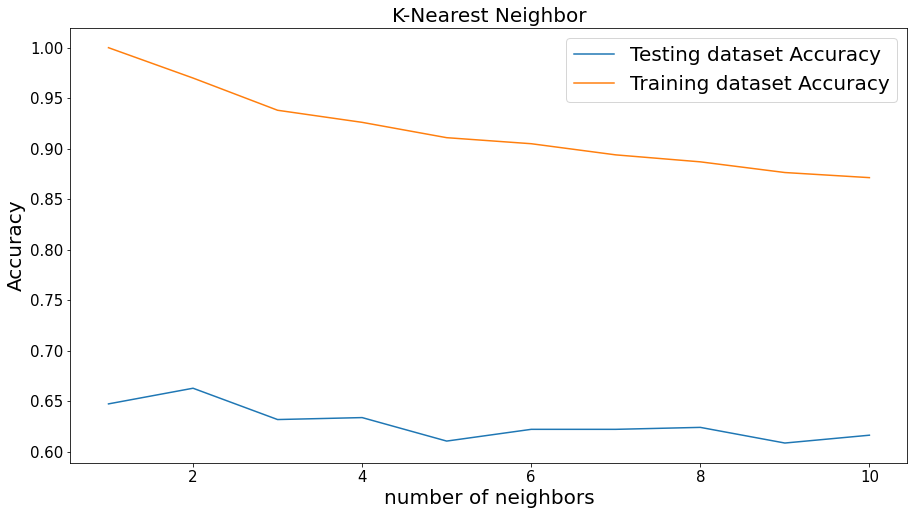

In [50]:
## After BorderlineSMOTE
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(np.array(sediment_train_x_sm), np.array(sediment_encoded_train_y_sm))
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(np.array(sediment_train_x_sm), np.array(sediment_encoded_train_y_sm))
    test_accuracy[i] = knn.score(np.array(sediment_test_x), np.array(sediment_encoded_test_y))
  
# Generate plot
plt.figure(figsize=(15,8))
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend(fontsize=20)
plt.xlabel('number of neighbors', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('K-Nearest Neighbor', fontsize=20)

plt.show()

In [51]:
test_accuracy # select K=2 (test_accuracy=0.6627907)

array([0.64728682, 0.6627907 , 0.63178295, 0.63372093, 0.61046512,
       0.62209302, 0.62209302, 0.62403101, 0.60852713, 0.61627907])

In [52]:
# modeling with K=2
knn = KNeighborsClassifier(n_neighbors=2)
  
knn.fit(np.array(sediment_train_x_sm), np.array(sediment_encoded_train_y_sm))

KNeighborsClassifier(n_neighbors=2)

In [53]:
# Predict on dataset which model has not seen before
print(knn.predict(np.array(sediment_test_x)))

[0 1 1 2 1 1 1 1 1 1 1 2 1 2 0 3 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1
 2 1 2 1 1 1 1 2 0 2 0 1 2 1 1 1 1 1 1 2 0 1 0 2 3 0 0 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 2 1 2 2 0 1 2 1 1 2 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 0 2 2 2 1 0 1
 3 0 2 1 2 1 1 1 2 1 1 1 1 1 1 1 0 1 2 2 2 1 2 2 1 1 3 1 2 3 1 1 1 1 1 2 1
 3 1 2 1 1 1 2 1 1 2 2 2 2 1 1 1 1 2 1 1 1 2 1 2 2 1 1 3 2 1 2 0 1 1 1 1 2
 2 1 1 2 2 2 2 1 2 1 1 1 1 1 2 1 1 2 0 0 2 2 1 1 2 2 1 0 2 0 0 2 1 1 1 1 1
 1 2 1 1 2 0 2 1 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 2 1 1 1
 1 1 1 2 2 1 2 3 1 2 1 1 2 0 1 2 1 2 1 1 1 3 2 3 1 1 1 1 1 2 1 1 3 1 3 2 1
 2 2 1 1 1 1 2 1 1 2 1 1 1 2 2 1 3 3 0 1 1 1 1 2 1 2 2 2 1 1 3 2 1 1 1 2 2
 1 1 1 1 2 1 2 1 2 2 1 1 1 1 1 1 1 1 1 2 2 1 1 3 1 1 1 1 1 1 2 2 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 2 0 1 2 2 1 1 1 1 3 3 1 1 1 2 1 1 1 1 1 2 1 2 1 1
 1 2 2 1 1 1 1 1 1 1 1 1 3 3 3 0 1 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2
 3 0 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1 2 1 2 2 1 1 1 1 2 1 1 1 1 1 2
 1 0 1 1 1 1 1 1 1 0 1 1 

In [54]:
# Calculate the accuracy and f1-score of the model
knn_pred = knn.predict(np.array(sediment_test_x))
accuracy = accuracy_score(knn_pred, np.array(sediment_encoded_test_y))
f1 = f1_score(knn_pred, np.array(sediment_encoded_test_y), average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6627906976744186
F1 Score: 0.6705794783512172


In [55]:
print(classification_report(knn_pred, np.array(sediment_encoded_test_y)))

              precision    recall  f1-score   support

           0       0.42      0.32      0.36        31
           1       0.82      0.75      0.78       338
           2       0.41      0.53      0.46       124
           3       0.57      0.52      0.55        23

    accuracy                           0.66       516
   macro avg       0.55      0.53      0.54       516
weighted avg       0.68      0.66      0.67       516



In [27]:
### Gaussian Naive Bayes (GaussianNB)
from sklearn.naive_bayes import GaussianNB

In [35]:
## Before SMOTE-Tomek
# Build a Gaussian Classifier
gnb = GaussianNB()

# Model training
gnb.fit(np.array(sediment_train_x), np.array(sediment_encoded_train_y))

# Predict Output
gnb_pred = gnb.predict(np.array(sediment_test_x))

In [36]:
print(gnb_pred)

[2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 2 1
 2 1 1 1 1 1 1 2 0 2 2 2 2 1 1 2 1 1 2 2 0 1 3 1 2 2 2 1 1 2 1 1 2 1 1 1 1
 1 1 2 2 1 1 2 1 2 2 2 1 1 1 1 2 3 2 2 1 2 1 1 1 1 1 2 1 1 1 0 1 2 2 1 0 1
 0 2 2 1 2 1 2 2 3 2 2 2 1 1 1 1 0 0 2 2 1 1 2 1 1 2 0 1 2 2 1 1 1 2 1 1 1
 1 2 2 1 1 1 2 1 1 1 1 0 2 1 1 2 1 2 1 2 1 1 2 2 1 1 1 3 2 2 2 0 1 1 2 2 2
 2 2 2 2 2 2 2 1 2 1 2 1 1 1 1 2 2 0 2 2 2 2 1 1 2 2 1 0 2 2 2 0 1 1 1 1 1
 1 1 2 2 1 2 1 1 1 1 2 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1
 2 1 1 1 3 1 1 2 1 2 2 2 2 3 1 1 2 1 2 1 1 3 1 0 2 1 2 1 1 1 1 2 2 2 2 1 1
 2 1 1 1 1 1 2 1 2 2 1 1 1 2 1 1 2 2 3 1 2 1 2 1 2 2 2 2 1 1 1 2 1 1 1 2 2
 1 1 1 0 2 1 0 1 1 2 1 2 1 1 1 2 1 2 1 1 2 1 1 3 1 3 1 1 1 1 1 1 1 1 1 1 3
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 2 2 3 1 1 1 1 3 1 1 3 1 1 1 1 1 1 1 2 0 0 1
 1 2 2 1 1 1 1 1 1 1 1 1 1 3 3 3 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3
 3 1 2 1 1 1 1 1 1 1 1 1 

In [37]:
# Calculate the accuracy and f1-score of the model
accuracy = accuracy_score(gnb_pred, np.array(sediment_encoded_test_y))
f1 = f1_score(gnb_pred, np.array(sediment_encoded_test_y), average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.7848837209302325
F1 Score: 0.7876805674332898


In [158]:
## After SMOTE-Tomek
# Build a Gaussian Classifier
gnb = GaussianNB()

# Model training
gnb.fit(np.array(sediment_train_x_smt), np.array(sediment_encoded_train_y_smt))

# Predict Output
gnb_pred = gnb.predict(np.array(sediment_test_x))

In [159]:
print(gnb_pred)

[0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 1 1 1 1 2 2 2 2 1 1 1 1 2 1
 2 1 1 1 2 1 1 2 0 2 2 2 2 1 1 2 1 1 2 2 0 1 3 2 2 2 0 1 1 2 1 1 2 1 1 1 1
 2 2 2 2 1 1 2 1 2 2 2 1 2 2 1 2 3 2 2 1 2 2 1 1 1 1 2 1 2 1 0 2 2 2 1 0 1
 0 2 2 2 2 1 2 2 3 0 2 2 1 2 1 0 0 3 2 2 1 1 2 1 1 2 0 2 2 2 1 1 2 2 1 1 1
 1 2 0 1 1 1 2 2 1 1 1 0 2 1 1 2 1 2 1 2 1 1 2 2 1 1 1 3 2 2 2 0 1 1 2 2 2
 2 2 2 2 2 2 2 1 2 1 2 1 1 1 1 2 2 0 0 2 2 2 1 1 2 2 1 0 2 2 2 0 1 1 1 1 1
 2 2 2 2 1 2 1 1 1 1 2 2 2 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 1 2 1
 2 1 1 1 3 1 1 2 1 2 2 2 2 3 1 1 2 2 2 1 1 3 1 0 2 1 2 2 1 1 1 2 0 2 2 1 2
 2 1 1 1 1 1 2 1 2 2 1 1 1 2 2 1 2 2 3 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 1 2 2
 1 1 1 0 2 1 0 1 1 2 1 2 1 1 1 2 1 2 1 1 2 1 1 3 1 3 1 1 1 1 1 1 1 1 1 1 3
 1 1 3 1 1 1 1 1 0 1 1 1 0 1 1 2 0 3 1 1 1 1 3 1 1 3 1 1 1 1 1 1 1 2 0 0 1
 1 2 2 1 1 1 1 1 1 1 1 1 1 3 3 3 0 3 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 2 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 3 1 1 1 3
 3 1 2 1 1 1 1 1 1 1 1 1 

In [160]:
# Calculate the accuracy and f1-score of the model
accuracy = accuracy_score(gnb_pred, np.array(sediment_encoded_test_y))
f1 = f1_score(gnb_pred, np.array(sediment_encoded_test_y), average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.7441860465116279
F1 Score: 0.7388290306521585


In [50]:
### Bagging
from sklearn.ensemble import BaggingClassifier

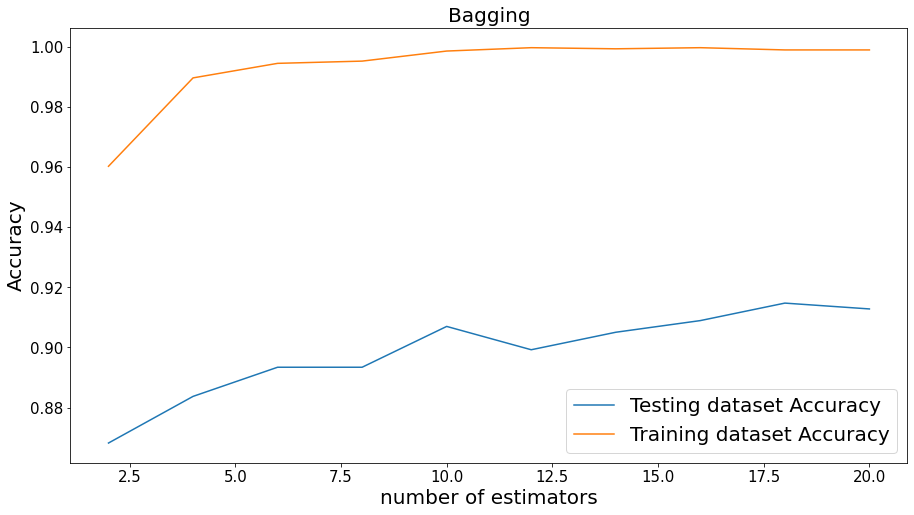

In [52]:
## Before SMOTE-Tomek
estimator_range = [2,4,6,8,10,12,14,16,18,20]

models = []
scores = []

for i, n_estimators in enumerate(estimator_range):

    # Create bagging classifier
    bag = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    bag.fit(np.array(sediment_train_x), np.array(sediment_encoded_train_y))

    # Compute training and test data accuracy
    train_accuracy[i] = bag.score(np.array(sediment_train_x), np.array(sediment_encoded_train_y))
    test_accuracy[i] = bag.score(np.array(sediment_test_x), np.array(sediment_encoded_test_y))
  
# Generate plot
plt.figure(figsize=(15,8))
plt.plot(estimator_range, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(estimator_range, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend(fontsize=20)
plt.xlabel('number of estimators', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Bagging', fontsize=20)

plt.show()

In [53]:
test_accuracy # select n_estimators=18 (test_accuracy=0.91472868)

array([0.86821705, 0.88372093, 0.89341085, 0.89341085, 0.90697674,
       0.89922481, 0.90503876, 0.90891473, 0.91472868, 0.9127907 ])

In [54]:
# modeling with n-estimators=18
bag = BaggingClassifier(n_estimators = 18, random_state = 22)
  
bag.fit(np.array(sediment_train_x), np.array(sediment_encoded_train_y))

BaggingClassifier(n_estimators=18, random_state=22)

In [55]:
# Predict on dataset which model has not seen before
print(bag.predict(np.array(sediment_test_x)))

[0 1 1 1 1 2 1 1 2 1 2 2 2 2 2 2 2 1 1 2 1 1 2 1 1 1 1 2 2 1 1 1 2 1 1 1 1
 2 1 2 1 1 1 1 2 2 2 2 2 2 1 2 1 1 1 2 2 0 1 3 1 2 0 2 1 1 2 1 1 1 1 1 1 1
 1 2 2 1 1 1 2 1 2 2 2 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 2 2 1 1 0 1 2 1 1 0 1
 3 2 2 1 2 1 2 1 3 1 1 2 1 1 2 1 0 1 2 2 1 1 2 2 1 2 3 1 2 3 1 1 1 2 1 1 1
 1 1 2 1 1 1 2 1 1 1 1 0 2 1 1 2 1 2 1 1 1 1 1 2 1 1 1 3 2 1 1 0 1 1 2 2 2
 2 2 2 2 1 0 2 1 1 1 2 1 1 1 1 1 1 0 0 2 2 2 1 1 2 2 1 0 1 2 2 0 1 1 1 1 1
 1 1 2 2 1 2 1 1 1 1 2 1 1 2 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1
 1 2 1 2 0 1 1 3 1 2 1 2 2 3 2 1 2 2 1 1 1 0 1 0 2 1 1 2 1 2 1 2 3 2 3 1 1
 1 1 1 1 1 1 0 1 1 2 1 1 1 2 1 1 2 0 3 1 2 1 2 1 1 2 0 2 1 1 1 2 2 1 1 2 2
 1 1 1 2 1 1 2 2 1 2 1 1 1 1 1 2 1 1 1 1 2 1 2 3 1 1 1 1 1 1 1 1 1 1 1 1 3
 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 2 2 1 3 1 1 1 3 1 1 3 1 1 1 1 1 1 1 2 2 2 1
 1 2 2 1 1 1 1 1 1 1 1 2 1 0 3 3 2 1 1 1 1 1 1 2 1 2 2 2 1 1 1 1 1 1 1 2 2
 2 2 1 2 2 2 2 2 1 1 1 2 2 1 1 1 1 2 1 3 2 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 2
 2 1 1 1 1 1 1 1 1 1 1 2 

In [56]:
bag_pred = bag.predict(np.array(sediment_test_x))

# Calculate the accuracy and f1-score of the model
accuracy = accuracy_score(bag_pred, np.array(sediment_encoded_test_y))
f1 = f1_score(bag_pred, np.array(sediment_encoded_test_y), average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.9147286821705426
F1 Score: 0.9148208567901999


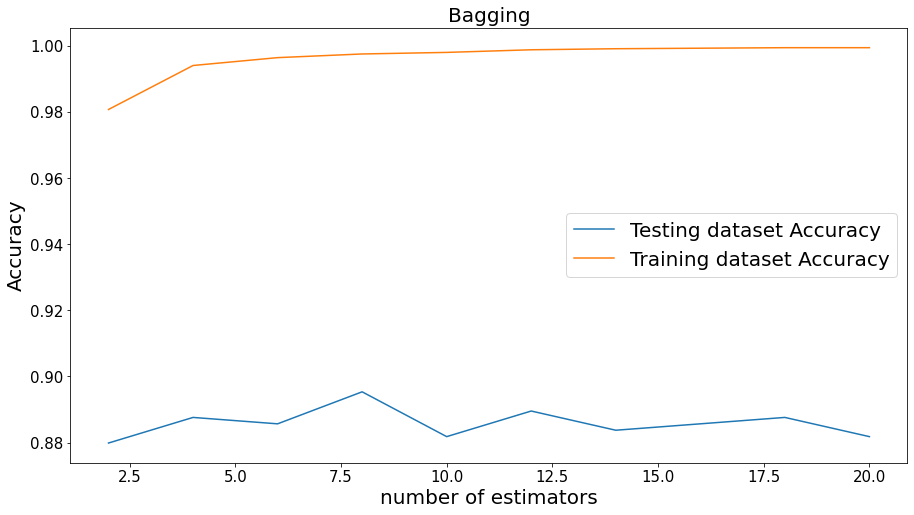

In [161]:
## After SMOTE-Tomek
estimator_range = [2,4,6,8,10,12,14,16,18,20]

models = []
scores = []

for i, n_estimators in enumerate(estimator_range):

    # Create bagging classifier
    bag = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    bag.fit(np.array(sediment_train_x_smt), np.array(sediment_encoded_train_y_smt))

    # Compute training and test data accuracy
    train_accuracy[i] = bag.score(np.array(sediment_train_x_smt), np.array(sediment_encoded_train_y_smt))
    test_accuracy[i] = bag.score(np.array(sediment_test_x), np.array(sediment_encoded_test_y))
  
# Generate plot
plt.figure(figsize=(15,8))
plt.plot(estimator_range, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(estimator_range, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend(fontsize=20)
plt.xlabel('number of estimators', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Bagging', fontsize=20)

plt.show()

In [162]:
test_accuracy # select n_estimators=8 (test_accuracy=0.89534884)

array([0.87984496, 0.8875969 , 0.88565891, 0.89534884, 0.88178295,
       0.88953488, 0.88372093, 0.88565891, 0.8875969 , 0.88178295])

In [164]:
# modeling with n-estimators=8
bag = BaggingClassifier(n_estimators = 8, random_state = 22)
  
bag.fit(np.array(sediment_train_x_smt), np.array(sediment_encoded_train_y_smt))

BaggingClassifier(n_estimators=8, random_state=22)

In [165]:
# Predict on dataset which model has not seen before
print(bag.predict(np.array(sediment_test_x)))

[0 1 1 1 1 2 1 1 2 1 2 2 2 2 2 2 2 1 1 2 1 1 2 1 1 1 1 2 2 1 1 1 2 1 1 2 1
 2 1 2 1 1 1 1 2 2 2 2 2 2 1 2 1 1 1 2 2 0 1 3 1 1 2 0 1 1 2 1 1 1 2 1 1 1
 1 2 2 1 1 1 2 1 2 2 2 1 1 1 2 2 3 2 1 1 1 1 1 1 1 1 2 1 1 1 0 1 2 1 1 2 1
 3 2 2 1 2 1 2 2 2 1 1 2 1 1 2 1 0 1 2 2 1 1 2 1 2 2 3 1 2 3 1 1 1 2 1 1 1
 1 2 0 1 1 1 2 1 1 1 1 0 0 1 1 0 1 2 1 1 1 1 2 2 1 1 1 3 2 1 1 0 1 1 2 2 2
 2 2 2 2 1 2 2 1 1 1 2 1 1 1 1 1 1 2 0 2 2 2 1 1 2 2 1 0 1 2 2 2 1 1 1 1 1
 1 1 2 2 1 2 1 1 1 1 2 2 1 2 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1
 1 2 1 2 3 1 1 3 1 2 1 2 2 3 2 1 2 1 1 1 1 0 1 0 2 1 1 2 1 2 1 2 3 2 3 1 1
 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 2 3 1 2 1 2 1 1 2 0 2 1 1 1 2 2 1 1 2 2
 1 1 1 2 1 1 2 2 1 2 1 1 1 1 1 2 2 1 1 1 0 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 3
 1 1 2 1 2 1 2 1 1 1 1 1 1 1 2 2 2 1 3 1 1 3 3 1 1 3 1 1 1 1 1 1 1 2 2 2 1
 1 2 2 1 1 1 1 1 1 1 1 2 1 3 3 3 2 1 1 1 1 1 1 2 1 2 2 2 1 1 1 1 1 1 2 2 1
 2 2 1 2 2 2 2 2 1 1 1 2 2 1 1 1 1 1 1 3 2 2 2 2 1 1 1 1 1 1 1 2 2 2 1 1 2
 2 1 1 1 1 1 1 1 1 1 1 1 

In [166]:
bag_pred = bag.predict(np.array(sediment_test_x))

# Calculate the accuracy and f1-score of the model
accuracy = accuracy_score(bag_pred, np.array(sediment_encoded_test_y))
f1 = f1_score(bag_pred, np.array(sediment_encoded_test_y), average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.8953488372093024
F1 Score: 0.8957957043660791


In [68]:
### Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

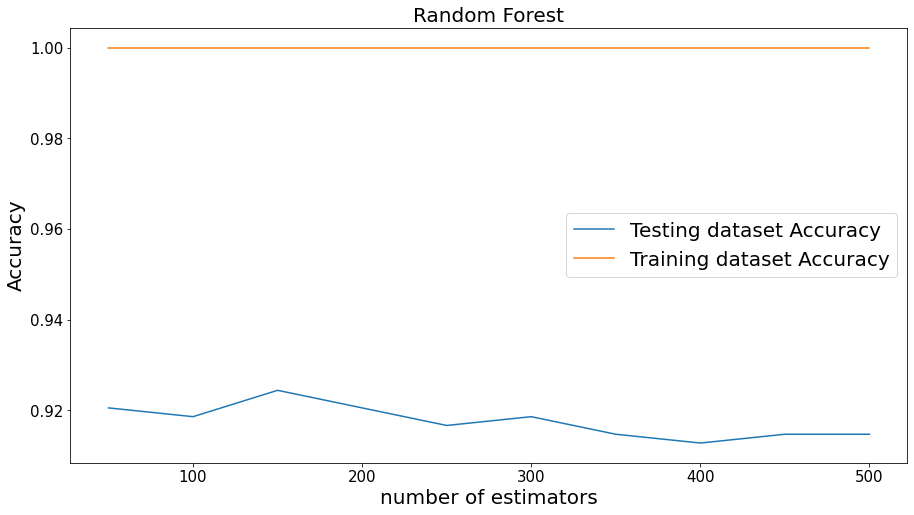

In [58]:
## Before SMOTE-Tomek
estimator_range = [50,100,150,200,250,300,350,400,450,500]

models = []
scores = []

for i, n_estimators in enumerate(estimator_range):

    # Create bagging classifier
    rf = RandomForestClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    rf.fit(np.array(sediment_train_x), np.array(sediment_encoded_train_y))

    # Compute training and test data accuracy
    train_accuracy[i] = rf.score(np.array(sediment_train_x), np.array(sediment_encoded_train_y))
    test_accuracy[i] = rf.score(np.array(sediment_test_x), np.array(sediment_encoded_test_y))
  
# Generate plot
plt.figure(figsize=(15,8))
plt.plot(estimator_range, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(estimator_range, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend(fontsize=20)
plt.xlabel('number of estimators', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Random Forest', fontsize=20)

plt.show()

In [59]:
test_accuracy # select n_estimators=150 (test_accuracy=0.9244186)

array([0.92054264, 0.91860465, 0.9244186 , 0.92054264, 0.91666667,
       0.91860465, 0.91472868, 0.9127907 , 0.91472868, 0.91472868])

In [61]:
# modeling with n-estimators=150
rf = RandomForestClassifier(n_estimators = 150, random_state = 22)
  
rf.fit(np.array(sediment_train_x), np.array(sediment_encoded_train_y))

RandomForestClassifier(n_estimators=150, random_state=22)

In [62]:
# Predict on dataset which model has not seen before
print(rf.predict(np.array(sediment_test_x)))

[0 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 1 1 2 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 2 1
 2 1 2 1 1 1 1 2 2 2 2 2 2 1 2 1 1 1 2 2 0 1 3 1 2 2 2 1 1 2 1 1 1 1 1 1 1
 1 2 2 1 1 1 2 1 2 2 2 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 0 1 2 1 1 2 1
 3 2 2 1 2 1 2 1 3 1 1 2 1 1 2 1 0 1 2 2 1 1 2 1 2 2 3 1 2 3 1 1 1 2 1 1 1
 1 2 0 1 1 1 2 1 1 1 1 0 2 1 1 2 1 2 1 1 1 1 1 2 1 1 1 3 2 1 1 0 1 1 2 2 2
 2 2 2 2 1 2 2 1 1 1 2 1 1 1 1 1 1 2 0 2 2 2 1 1 2 2 1 0 1 2 2 2 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1
 1 2 1 2 3 1 1 3 1 2 1 2 2 3 2 1 2 2 1 1 1 0 1 0 2 1 1 2 1 1 1 2 3 2 3 1 1
 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 2 3 1 2 1 2 1 1 2 0 2 1 1 1 2 2 1 1 2 2
 1 1 1 2 1 1 2 2 1 2 1 1 1 1 1 2 1 1 1 1 2 1 2 3 1 2 1 1 1 1 1 1 1 1 1 1 2
 1 1 2 1 1 1 1 1 2 1 1 2 2 1 2 2 2 1 1 1 1 1 3 1 1 3 1 1 1 1 1 1 1 2 2 2 1
 1 2 2 1 1 1 1 1 1 1 1 2 1 3 3 3 2 1 1 1 1 1 1 2 1 2 2 2 1 1 1 1 1 1 1 2 2
 2 2 1 2 1 2 2 2 1 1 1 2 2 1 1 1 1 1 1 3 2 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 2
 2 1 1 1 1 1 1 1 1 1 1 2 

In [63]:
rf_pred = rf.predict(np.array(sediment_test_x))

# Calculate the accuracy and f1-score of the model
accuracy = accuracy_score(rf_pred, np.array(sediment_encoded_test_y))
f1 = f1_score(rf_pred, np.array(sediment_encoded_test_y), average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.9244186046511628
F1 Score: 0.9257588046721943


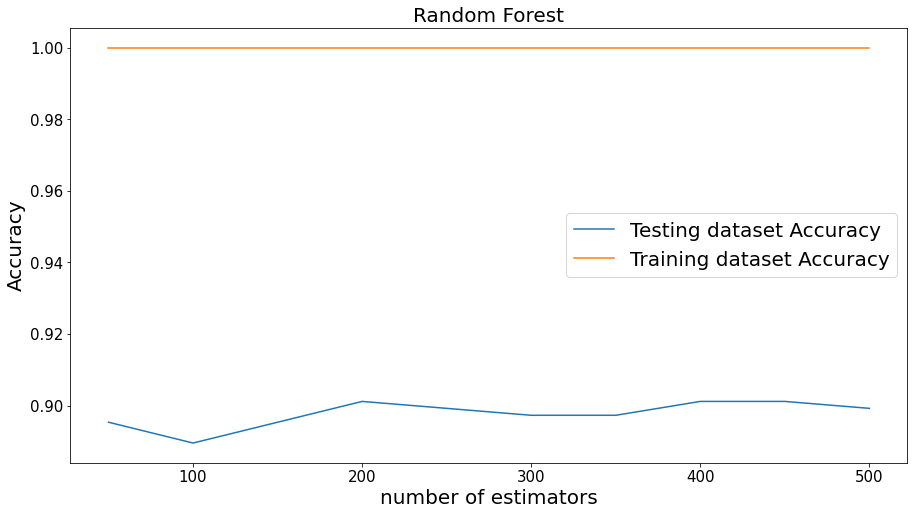

In [167]:
## After SMOTE-Tomek
estimator_range = [50,100,150,200,250,300,350,400,450,500]

models = []
scores = []

for i, n_estimators in enumerate(estimator_range):

    # Create bagging classifier
    rf = RandomForestClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    rf.fit(np.array(sediment_train_x_smt), np.array(sediment_encoded_train_y_smt))

    # Compute training and test data accuracy
    train_accuracy[i] = rf.score(np.array(sediment_train_x_smt), np.array(sediment_encoded_train_y_smt))
    test_accuracy[i] = rf.score(np.array(sediment_test_x), np.array(sediment_encoded_test_y))
  
# Generate plot
plt.figure(figsize=(15,8))
plt.plot(estimator_range, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(estimator_range, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend(fontsize=20)
plt.xlabel('number of estimators', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Random Forest', fontsize=20)

plt.show()

In [168]:
test_accuracy # select n_estimators=200 (test_accuracy=0.90116279)

array([0.89534884, 0.88953488, 0.89534884, 0.90116279, 0.89922481,
       0.89728682, 0.89728682, 0.90116279, 0.90116279, 0.89922481])

In [169]:
# modeling with n-estimators=200
rf = RandomForestClassifier(n_estimators = 200, random_state = 22)
  
rf.fit(np.array(sediment_train_x_smt), np.array(sediment_encoded_train_y_smt))

RandomForestClassifier(n_estimators=200, random_state=22)

In [119]:
# Predict on dataset which model has not seen before
print(rf.predict(np.array(sediment_test_x)))

[0 1 1 1 1 2 1 1 2 1 2 2 2 2 2 2 2 1 1 2 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 2 1
 2 1 2 1 1 1 1 2 0 2 2 2 2 1 2 1 1 1 2 2 0 1 3 1 2 2 2 1 1 2 1 1 1 1 1 1 1
 1 2 2 1 1 1 2 1 2 2 2 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 0 1 2 1 1 2 1
 3 2 2 1 2 1 2 1 3 1 2 2 1 1 2 1 0 1 2 2 1 1 2 2 1 2 3 1 2 3 1 1 1 2 1 1 1
 1 2 0 1 1 1 2 1 1 1 1 0 2 1 1 2 1 2 1 2 1 1 2 2 1 1 1 3 2 1 1 0 1 1 2 2 2
 2 2 2 2 1 2 2 1 1 1 2 1 1 1 1 1 1 2 0 2 2 2 1 1 2 2 1 0 1 2 2 2 1 1 1 1 1
 1 1 2 2 1 2 1 1 1 1 2 2 1 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1
 1 2 1 2 3 1 1 3 1 2 1 2 2 3 2 1 2 2 2 1 1 0 1 0 2 1 1 2 1 1 1 2 3 2 3 1 1
 1 1 1 1 1 1 0 1 1 2 1 1 1 2 1 1 2 0 3 1 2 1 2 1 1 2 0 2 1 1 1 2 2 1 1 2 2
 1 1 1 2 1 1 2 2 1 2 1 2 1 1 1 2 1 2 1 1 2 1 2 3 1 2 1 1 1 1 1 1 1 1 1 1 3
 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 2 2 3 1 1 1 3 3 1 1 3 1 1 1 1 1 1 1 2 2 2 1
 1 2 2 1 1 1 1 1 1 1 1 2 1 0 3 3 2 1 1 1 1 1 1 2 1 2 2 2 1 1 1 1 1 1 2 2 2
 3 2 1 2 1 2 2 2 1 1 1 2 2 1 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 1 1 2 2 1 1 2
 2 1 1 1 1 1 1 1 1 1 1 2 

In [170]:
rf_pred = rf.predict(np.array(sediment_test_x))

# Calculate the accuracy and f1-score of the model
accuracy = accuracy_score(rf_pred, np.array(sediment_encoded_test_y))
f1 = f1_score(rf_pred, np.array(sediment_encoded_test_y), average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.9011627906976745
F1 Score: 0.9016404194614509


In [42]:
### Support Vector Machine (SVM)
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

ValueError: x and y must have same first dimension, but have shapes (1,) and (10,)

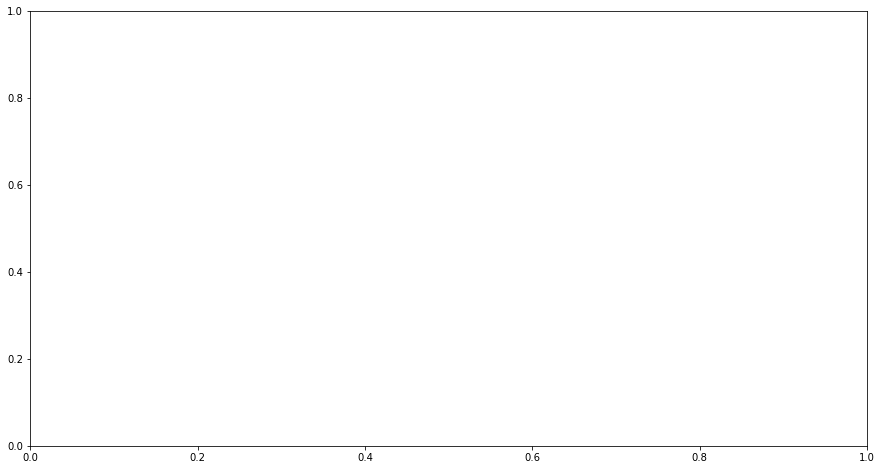

In [123]:
## Before SMOTE
C_float = [0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0]

models = []
scores = []

for i, C_float in enumerate(C_float):

    # Create bagging classifier
    svc = svm.SVC(kernel = "rbf", C = C_float, random_state = 100)

    # Fit the model
    svc.fit(np.array(sediment_train_x), np.array(sediment_encoded_train_y))

    # Compute training and test data accuracy
    train_accuracy[i] = svc.score(np.array(sediment_train_x), np.array(sediment_encoded_train_y))
    test_accuracy[i] = svc.score(np.array(sediment_test_x), np.array(sediment_encoded_test_y))
  
# Generate plot
plt.figure(figsize=(15,8))
plt.plot(C_float, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(C_float, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend(fontsize=20)
plt.xlabel('C_float', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Support Vector Machine', fontsize=20)

plt.show()

In [122]:
test_accuracy # select n_estimators=150 (test_accuracy=0.9244186)

array([0.60465116, 0.60465116, 0.61046512, 0.61821705, 0.61821705,
       0.62403101, 0.63178295, 0.64534884, 0.65697674, 0.6627907 ])

In [ ]:
# modeling with n-estimators=20
svc = svm.SVC(kernel = "rbf", C = 2.0, random_state = 100)
  
svc.fit(np.array(sediment_train_x), np.array(sediment_encoded_train_y))

In [ ]:
# Predict on dataset which model has not seen before
print(svc.predict(np.array(sediment_test_x)))

In [ ]:
svc_pred = svc.predict(np.array(sediment_test_x))

# Calculate the accuracy and f1-score of the model
accuracy = accuracy_score(svc_pred, np.array(sediment_encoded_test_y))
f1 = f1_score(svc_pred, np.array(sediment_encoded_test_y), average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)